#  Analysis of the Features of Credit Card Churned Customers

## Ingest 

Data Source:  https://www.kaggle.com/sakshigoyal7/credit-card-customers

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

### Read in Data 

In [2]:
# You can download the data from the above-mentioned website and change the address where your own files are stored.
data = pd.read_csv('BankChurners.csv')

In [3]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Find N/A

In [4]:
data.isnull().values.any()

False

The result shows that the data has no missing values.

### Clean Data

The first and last two columns have no effect on subsequent analysis, so delete them.

In [5]:
data = data.iloc[:,:-2]
data = data.drop(columns=['CLIENTNUM'],axis=1)

In [6]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
data.shape

(10127, 20)

In [8]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

The cleaned data set contains a total of 20 variables, of which 6 are categorical ones, including: Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category and Card_Category.

### Feature Description 

*Customer_Age*: Customer's Age in Years

*Gender*: M=Male, F=Female

*Dependent_count*: Number of dependents

*Education_Level*: Educational Qualification of the account holder
(example: high school, college graduate, etc.)

*Marital_Status*: Married, Single, Divorced, Unknown

*Income_Category*: Annual Income Category of the account holder ((< 40K, 40K - 60K, 60K - 80K, 80K-120K, >120K), unit:dollar)

*Card_Category*: Type of Card (Blue, Silver, Gold, Platinum)

*Months_on_book*: Period of relationship with bank

*Total_Relationship_Count*: Total No.of products held by the customer

*Months_Inactive_12_mon*: No.of months inactive in the last 12 months

*Contacts_Count_12_mon*: No.of Contacts in the last 12 months

*Credit_Limit*: Credit Limit on the Credit Card

*Total_Revolving_Bal*: Total Revolving Balance on the Credit Card

*Avg_Open_To_Buy*: Open to Buy Credit Line (Average of last 12 months)

*Total_Amt_Chng_Q4_Q1*: Change in Transaction Amount (Q4 over Q1)

*Total_Trans_Amt*: Total Transaction Amount (Last 12 months)

*Total_Trans_Ct*: Total Transaction Count (Last 12 months)

*Total_Ct_Chng_Q4_Q1*: Change in Transaction Count (Q4 over Q1)

*Avg_Utilization_Ratio*: Average Card Utilization Ratio

## EDA

### Target

*Attrition_Flag*: Internal event (customer activity) variable - if the account is closed then 1 else 0

In [9]:
target = data['Attrition_Flag']
print(target.value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


The result shows that the data is highly unbalanced.

###  Qualitative Variable Analysis

In [10]:
# Gender

Gender_counts = data['Gender'].value_counts()
Gender_counts

F    5358
M    4769
Name: Gender, dtype: int64

In [11]:
# Education Level

Education_Level_counts = data['Education_Level'].value_counts()
Education_Level_counts

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [12]:
# Marital Status

Marital_Status_counts = data['Marital_Status'].value_counts()
Marital_Status_counts

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [13]:
# Income Category

Income_Category_counts = data['Income_Category'].value_counts()
Income_Category_counts

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [14]:
# Card Category

Card_Category_counts = data['Card_Category'].value_counts()
Card_Category_counts

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

For subsequent modeling and analysis, we now perform numerical operations on qualitative variables.

In [15]:
data_processed = data.copy()

data_processed['Attrition_Flag'] = data_processed['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

data_processed['Gender'] = data_processed['Gender'].map({'M': 0, 'F': 1})

eduMap = {'Uneducated': 0, 'Unknown': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
data_processed['Education_Level'] = data_processed['Education_Level'].map(eduMap)

maritalMap = {'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced':3}
data_processed['Marital_Status'] = data_processed['Marital_Status'].map(maritalMap)

incomeMap = {'Less than $40K': 0, '$40K - $60K': 1, '$80K - $120K': 2, '$60K - $80K': 3,  '$120K +': 4, 'Unknown': 5}
data_processed['Income_Category'] = data_processed['Income_Category'].map(incomeMap)

cardMap = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}
data_processed['Card_Category'] = data_processed['Card_Category'].map(cardMap)

### Univariate Descriptive Analysis

We are interested in some information about the bank's credit card customers: income status, the types of credit cards held, and the number of times the credit cards are used, so a descriptive analysis of these three will be made as following.

#### Income 

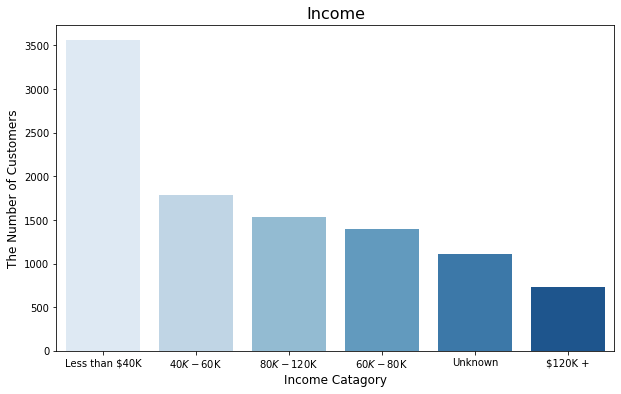

In [16]:
income = data['Income_Category'].value_counts()
income_x = income.index
income_y = income.values

plt.figure(figsize=(10,6))
sns.barplot(x=income_x,y=income_y, palette = sns.color_palette("Blues",6))
plt.title('Income',size=16)
plt.xlabel('Income Catagory',size=12)
plt.ylabel('The Number of Customers',size=12)
plt.tick_params(labelsize=10)
plt.show()

- Most of the customers lie in the lowest income groups, suggesting that the bank has a good reputation among lower income groups.

#### Types of Cards

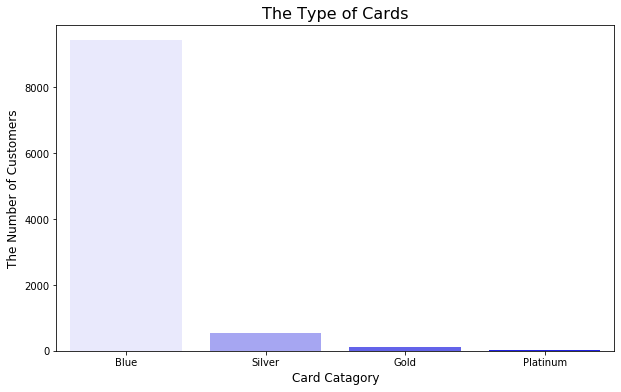

In [17]:
card = data['Card_Category'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=card.index,y=card.values, palette = sns.light_palette("Blue",4))
plt.title('The Type of Cards',size=16)
plt.xlabel('Card Catagory',size=12)
plt.ylabel('The Number of Customers',size=12)
plt.tick_params(labelsize=10)
plt.show()

- The grade of the credit card is Platinum>Gold>Silver>Blue, which is consistent with the trend of the income graph, indicating that Blue cards are famous among low income groups.

#### Average Card Utilization Ratio

Text(0.5, 1.0, 'Average Card Utilization Ratio')

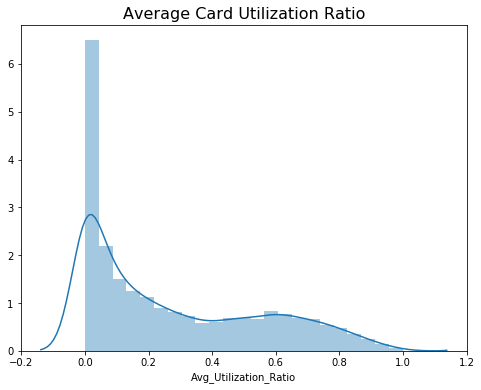

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(data['Avg_Utilization_Ratio'])
plt.title('Average Card Utilization Ratio',size=16)

- Most of the customers are utilising a small amount of their available credit line, which indicates they are conservative.

### Multivariate Analysis

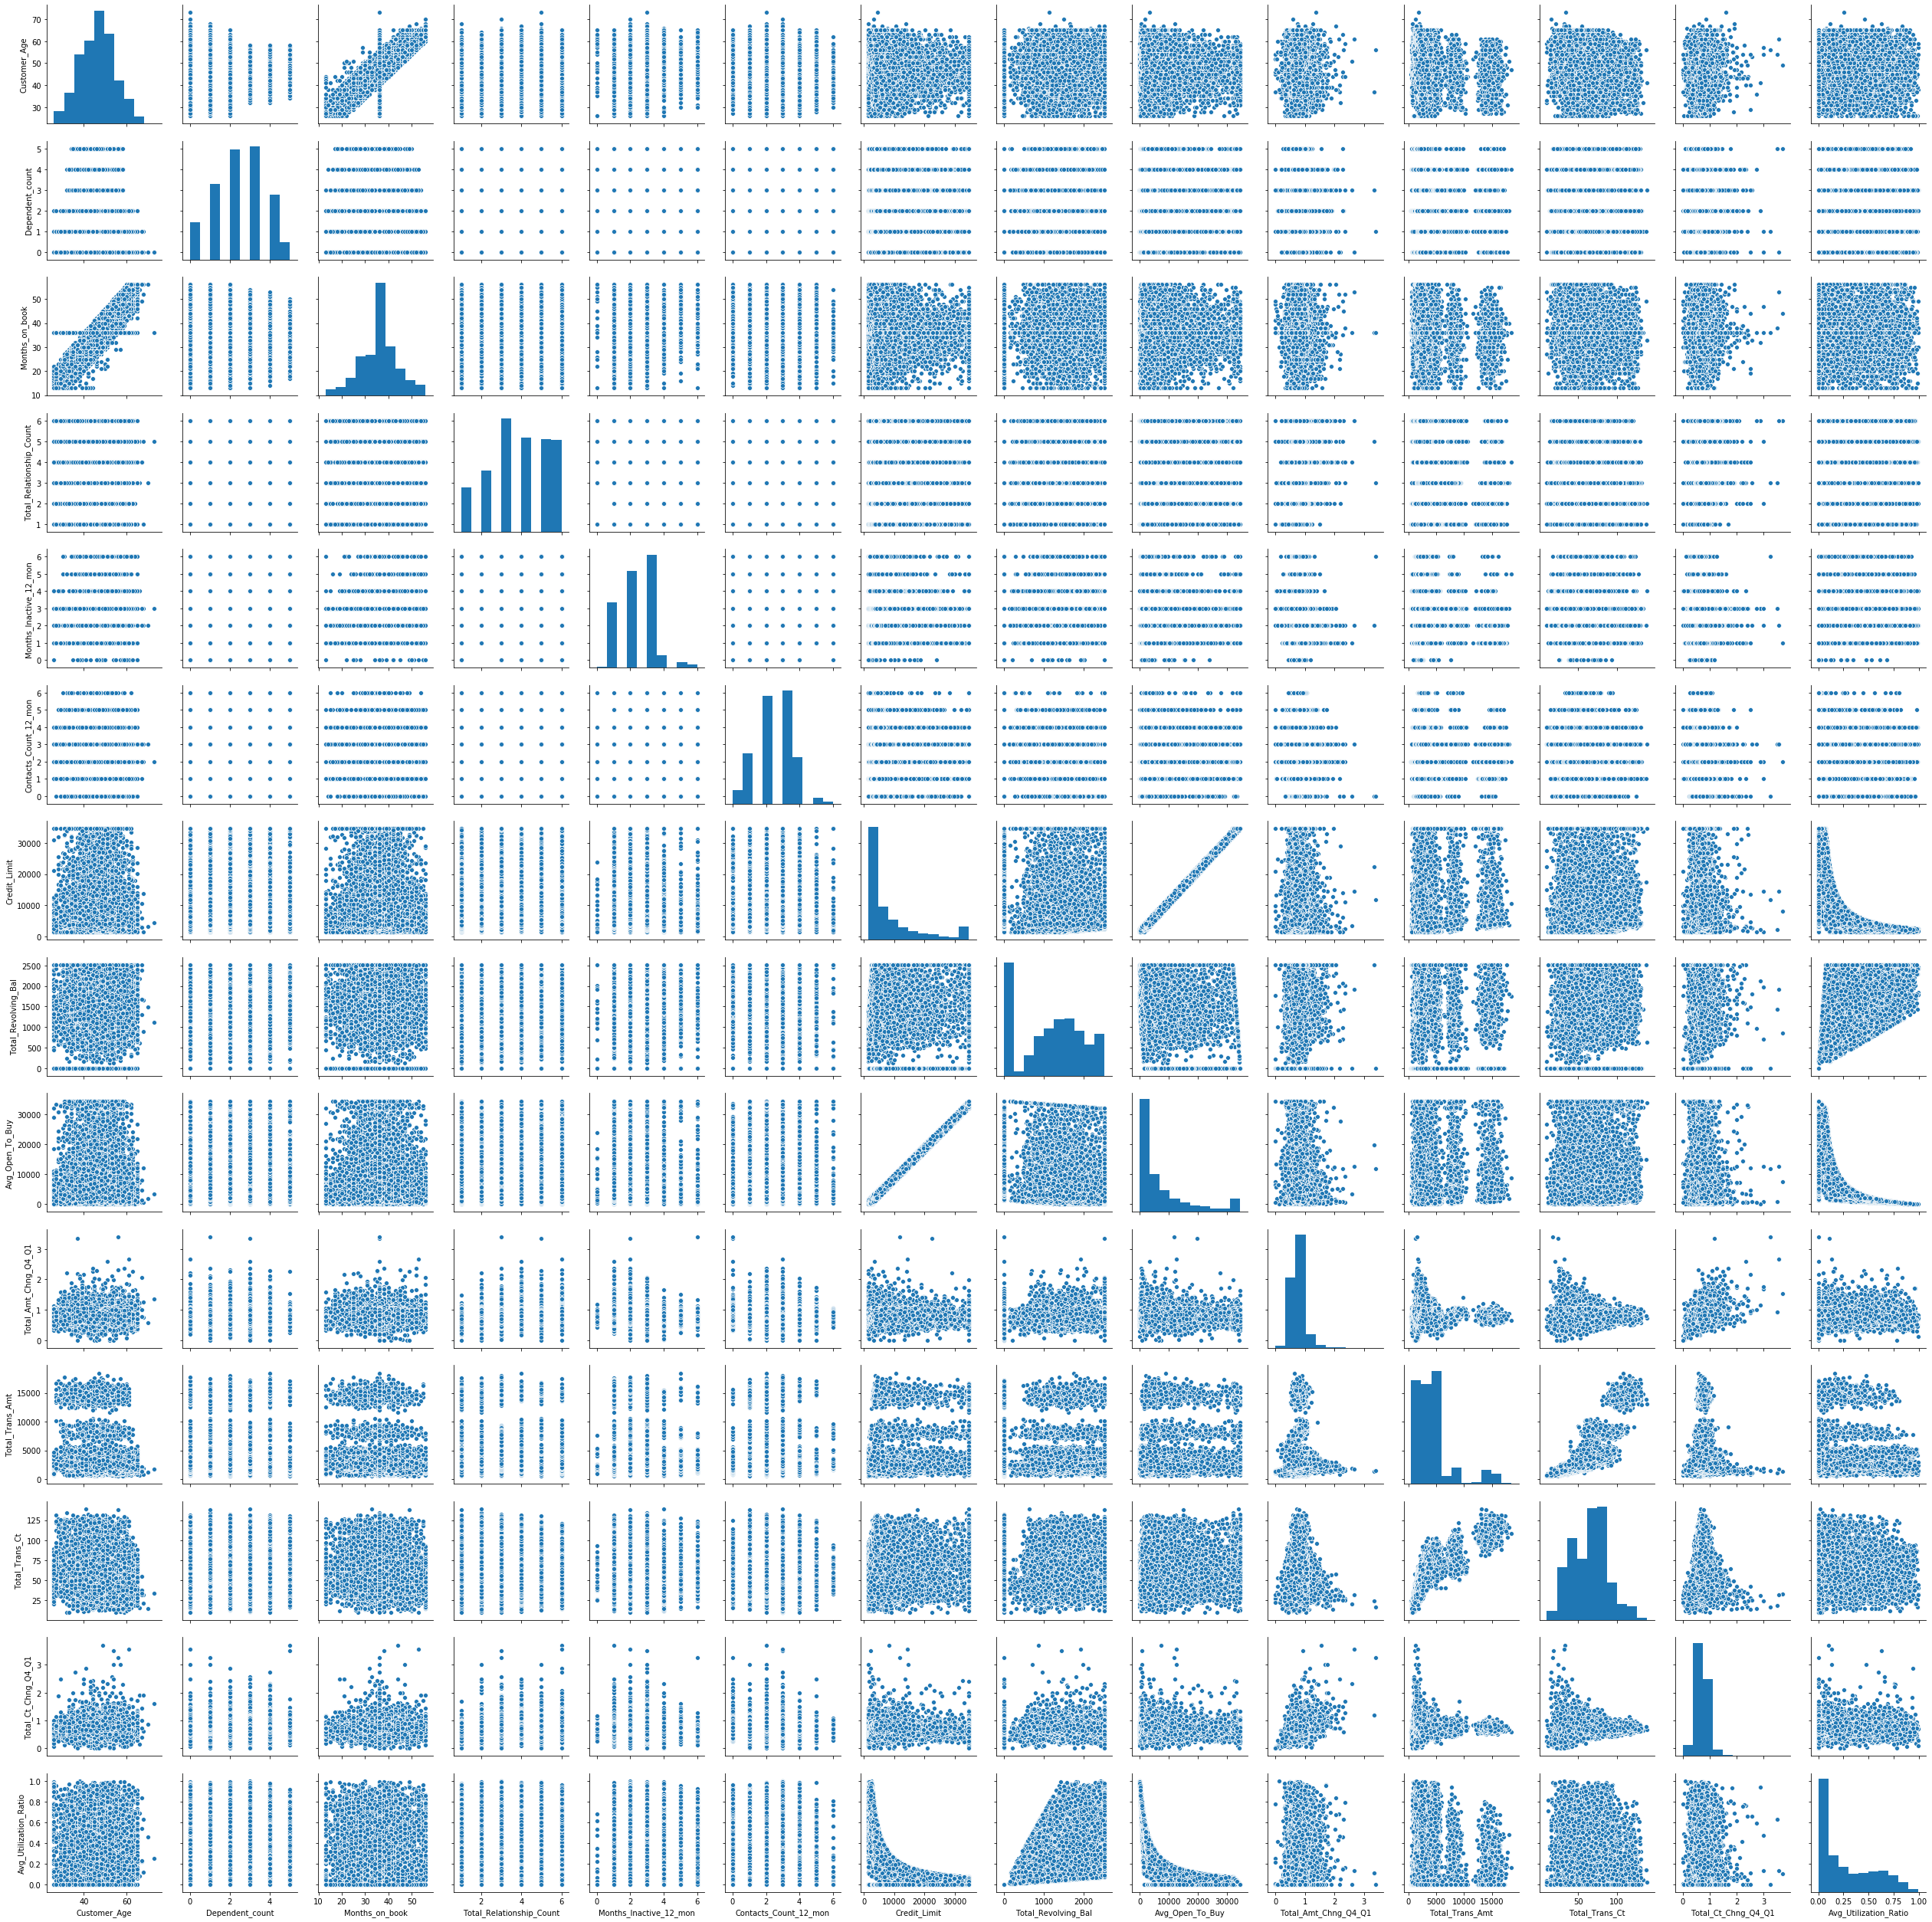

In [19]:
sns.pairplot(data)

- It indicates a positive linear relationship between customer age and the period of relationship with bank.
- The two variables:Credit Limit and Avg_Open_To_Buy(Open to Buy Credit Line (Average of last 12 months)) show collinearity is obvious, because these two variables reflect the same thing. The bank may not have noticed this when collecting data.

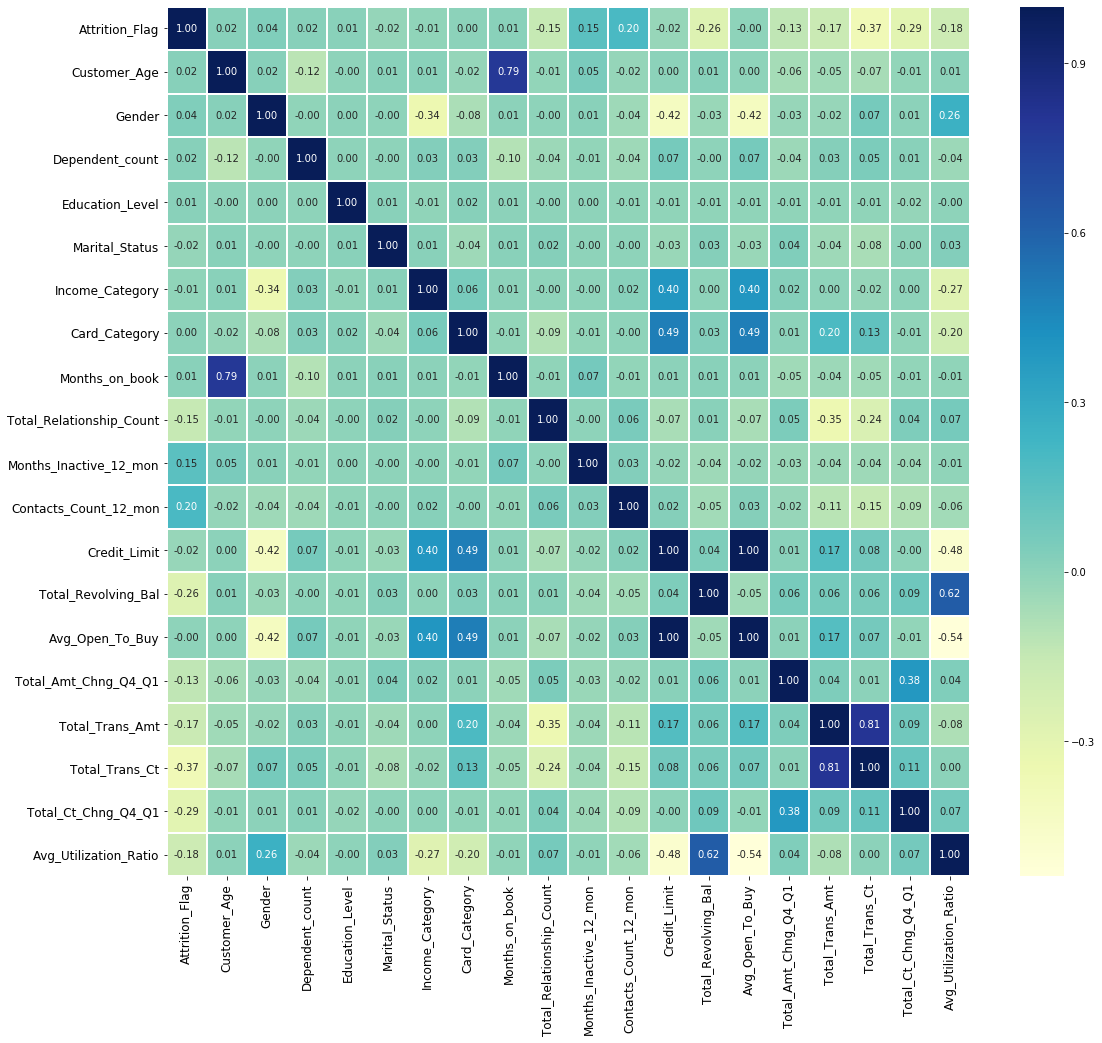

In [20]:
plt.figure(figsize=(18,16))
sns.heatmap(data_processed.corr(),linewidths=1.0,cmap='YlGnBu',annot=True,fmt='.2f')
plt.tick_params(labelsize = 12)

- Whether a certain customer is churned or not is almost irrelevant to these fators: Education Level, Income Category, Card Category, Months_on_Book(the period of relationship with bank), and Avg_Open_To_Buy(Open to Buy Credit Line (Average of last 12 months)).

#### *We Find Someting Interesting about Gender!*

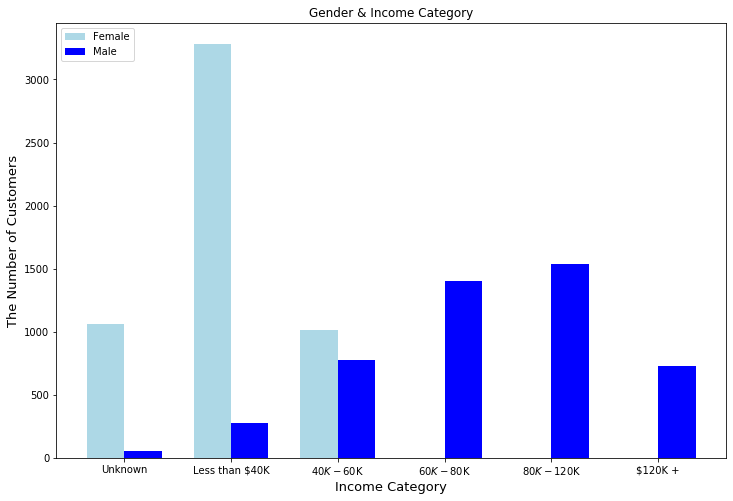

In [21]:
# Gender & Income 

gender_income = data.groupby(['Gender'])['Income_Category'].value_counts()   #为了好看，用原始数据
g_i = gender_income.unstack()[['Unknown' ,'Less than $40K','$40K - $60K','$60K - $80K', '$80K - $120K', '$120K +' ]]

plt.figure(figsize=(12,8))
x_index = np.arange(6)
x_data = g_i.columns
bar_width = 0.35

plot1 = plt.bar(x_index,g_i.loc['F'].values,label='Female',fc='lightblue',width=bar_width)
plot2 = plt.bar(x_index + bar_width,g_i.loc['M'].values,label='Male',fc='blue',width=bar_width)
plt.title('Gender & Income Category')
plt.xlabel('Income Category',size=13)
plt.ylabel('The Number of Customers',size=13)
plt.xticks(x_index + bar_width/2, x_data)
plt.legend(loc='best')
plt.tick_params(labelsize=10)
plt.show()

- Although there are more unknown values for women, comparing the number with the number of high-income men, it is not difficult to conclude that among the bank's credit card users, the income of male users is mostly in the middle and high income level, while the income of female users is mainly in a low income level.

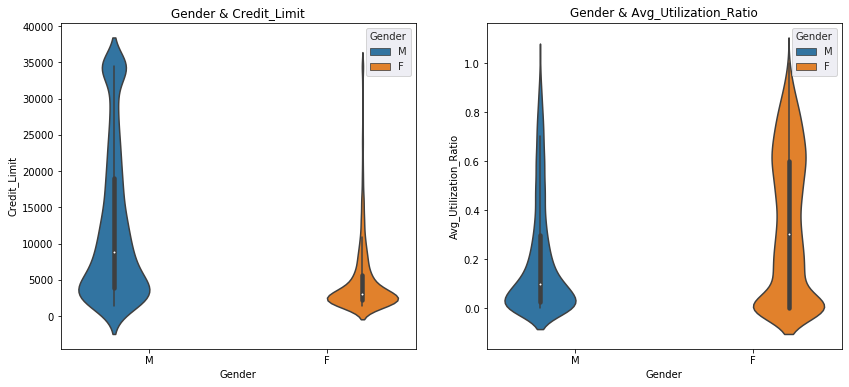

In [22]:
# Gender & Credit_Limit  and  Gender & Avg_Utilization_Ratio

fig, axes = plt.subplots(1,2,figsize=(14,6))
with sns.axes_style('darkgrid'):
    ax1 = sns.violinplot(x="Gender",y="Credit_Limit",data=data,hue="Gender",ax=axes[0])
    ax1.set_title('Gender & Credit_Limit')
    ax2 = sns.violinplot(x="Gender",y="Avg_Utilization_Ratio",data=data,hue="Gender",ax=axes[1])
    ax2.set_title('Gender & Avg_Utilization_Ratio')

- The credit card limit of female customers is generally at a low level, and the credit card limit of male customers is generally higher than that of female customers；
- Overall, the female customers use credit cards much more often than male customers.

#### *Compared with male customers, female customers on average use credit cards much more than male customers despite their lower income and lower credit card limit.*

## Modeling 

Although it can be found through the above EDA that variables such as Education Level, Income Category, Card Category and so on have little relationship with customer churn, modeling is an essential and key step in order to explore some characteristics of attrited customers and make scientific early warning of customer churn for the bank.

### Select Features

Considering the superiority of the XGBoost classifier in the classification problem, first use the XGBoost model to select the most important 10 variables.

In [23]:
X = data_processed.drop('Attrition_Flag', axis=1)
Y = data_processed['Attrition_Flag']

[16:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


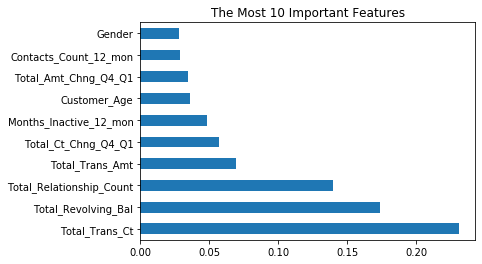

In [25]:
model = XGBClassifier().fit(X,Y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('The Most 10 Important Features')
plt.show()

In [26]:
importantFeatures = list(feature_importances.nlargest(10).index)
X_final = data_processed[importantFeatures]

### Process Inbalanced Data 

Taking into account the imbalance of the target, the SMOTE method in imblearn library is now used to process imbalanced data.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_final,Y,test_size= 0.3, random_state=1)

In [28]:
over = SMOTE(sampling_strategy='auto', random_state=2)
X_train_o, y_train_o = over.fit_resample(X_train,y_train)

### Logistic Regression 

In [29]:
logistic = LogisticRegression(solver='newton-cg')
logistic.fit(X_train_o, y_train_o)
pred = logistic.predict(X_test)

In [30]:
recall = recall_score(y_test,pred)
accuracy = accuracy_score(y_test,pred)

# classification_report for Attrited Customer  
print(classification_report(y_test,pred))
print("Recall: {}" .format(recall))
print("Accuracy: {}" .format(accuracy))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2551
           1       0.50      0.82      0.62       488

    accuracy                           0.84      3039
   macro avg       0.73      0.83      0.76      3039
weighted avg       0.89      0.84      0.85      3039

Recall: 0.819672131147541
Accuracy: 0.8390918065153011


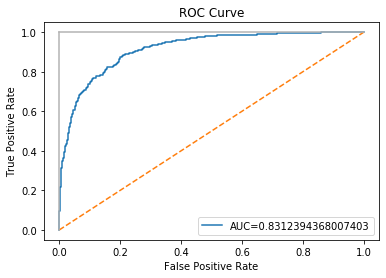

In [31]:
# ROC&AUC

target_probabilities = logistic.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)
auc = roc_auc_score(y_test, pred)
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,label='AUC={}'.format(auc))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc='best')
plt.show()

- The Recall is 0.82, the Accuracy is 0.84 and the AUC is 0.83, which indicate it's an ideal result.

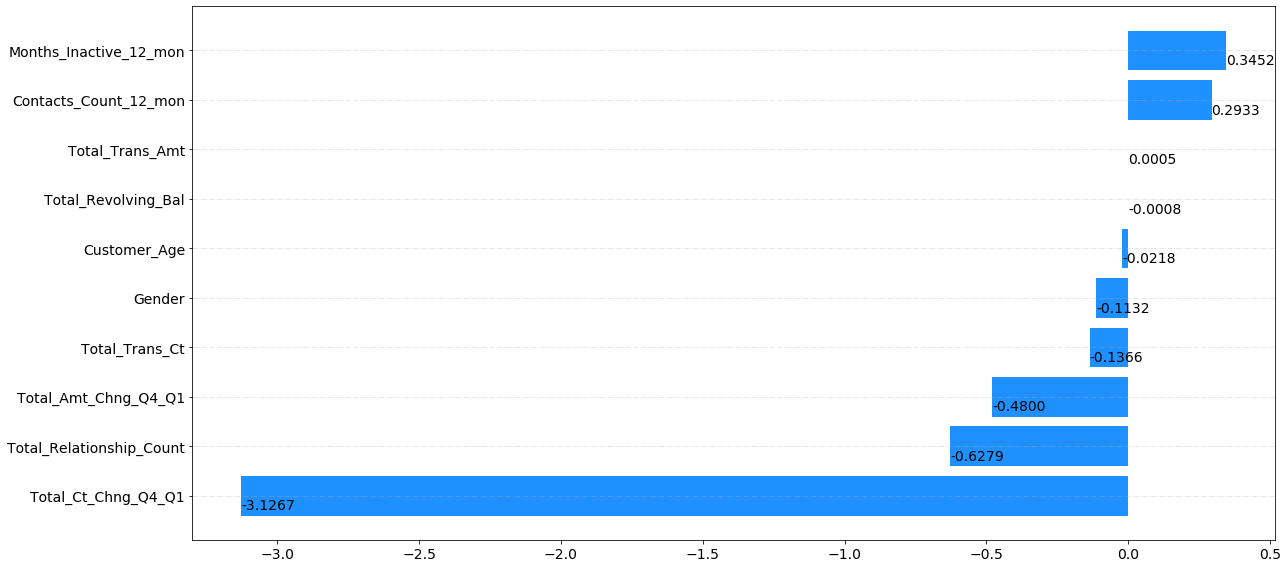

In [32]:
coef_lr = pd.DataFrame({'var' : X_test.columns,
                        'coef' : logistic.coef_.flatten()
                        })

index_sort =  coef_lr['coef'].sort_values().index
coef_lr_sort = coef_lr.loc[index_sort,:]


fig,ax=plt.subplots(figsize=(18,8))
x, y = coef_lr_sort['var'], coef_lr_sort['coef']
rects = plt.barh(x, y, color='dodgerblue')
plt.grid(linestyle="-.", axis='y', alpha=0.4)
plt.tick_params(labelsize=14)
plt.tight_layout()

for rect in rects:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/4,'%.4f' %w,ha='left',va='center',size=14)

- The Logistic coefficients of the number of months that customers being inactive to use credit cards in the last 12 months and the number of months with customer-bank contact in the last 12 months are positive and relatively large values, indicating that larger quantities of these lead to a higher probability of customer churn obviously. 
- The coefficient of customer's age in years is -0.0218, meaning the age of the customer’s increase per year, the log-odd of customer churn decreases by 0.0218. And, remarkably, the coefficient of gender shows a negative value, which means the female customers are less likely to lose for banks, under the condition that sets the value of female to 1. The coefficient of the total number of products held by the customer also shows a negative value of -0.6279, which represents less possibility of customer churn when the total number of products increases.

## Recommendations

Generally, there are 3 main factors for customer churn of credit card, including the level of customers being inactive, customer-bank contact frequency, and customer gender. The bank can choose to pay attention to the suggestions below according to its own situations.

#### 1. Since being inactive to use credit cards is an influential factor of customer churn, the bank should design and apply preferential policy for inactive credit card users to stimulate the usage of the credit card, for example, offering prime rate to the customers who tend to be inactive in several months.


#### 2. Customer-bank contact frequency also influences customer churn, which may indicate the relationship between customer service and customer churn. Thus, the bank should, on the one hand, pay attention to the quality of customer service and customers’ feedback, and on the other hand, keep a proper contact frequency with customers, in case more churned clients are caused by the boredom to the excessive contacts like ad messages or phone calls.

#### 3. To better keep existing customers, the bank should focus on the factors of female customers that have lower churn possibility, such as a higher frequency of credit card using compared to male customers. In this case, the bank can try activating male customers to use their credit cards.